<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/classification_AURELIEN_GERON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

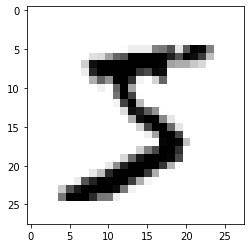

In [4]:
some_digit= X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap='binary')
plt.show()

In [5]:
y[0] # indeed this is what our label is telling us, note that label is a string

'5'

In [6]:
y # here we can see more clearly that all the labels are string

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y = y.astype(np.uint8) # casted from string to integer
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [8]:
# mnist dataset is already shuffled for us, this ensures our model doesnot learn the undesired patterns.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

first of all, let's create a binary classifier

# **BINARY CLASSIFICATION**

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5) # wherever there is 5, that label would be assigned to newly created label

In [10]:
# now let's train our model on SGD classifier from scikit learn library
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit]) # yeah, so it guesses it right

array([ True])

In [12]:
# now let's measure our accuracy using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [13]:
# now let's look at a classifier which classifies images into not-5 class
from sklearn.base import BaseEstimator
class never5classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [14]:
never_5_clf = never5classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')
""" now this came because we have very fewer desired predictions, so if our model predicts that it's not the image of 5, then
also it's right about 90 percent of the time. there fore accuracy is generally not preferred.
"""

" now this came because we have very fewer desired predictions, so if our model predicts that it's not the image of 5, then\nalso it's right about 90 percent of the time. there fore accuracy is generally not preferred.\n"

»note - **accuracy is not a preferred performance measure for classifiers when you're dealing with skewed datasets ( when some classes are more frequent than others )**

** A much better way to evaluate our models performance is to look at the confusion matrix**

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# cross_val_score return the score whereas this function returns the predicted values directly
y_train_pred
# we will get the clean predcition as we have predicted our results on the data that our model has never seen before ( because
# with cross validation we have shuffled our data and then have made the prediction over it)

array([ True, False, False, ...,  True, False, False])

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

»note - **each row in a confusion matrix represents an actual class and each column represents a predicted class**

In [17]:
# pretend we reached perfection ( for better understanding )
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions) # so here we can see, there are not any false positives and false negatives

array([[54579,     0],
       [    0,  5421]])

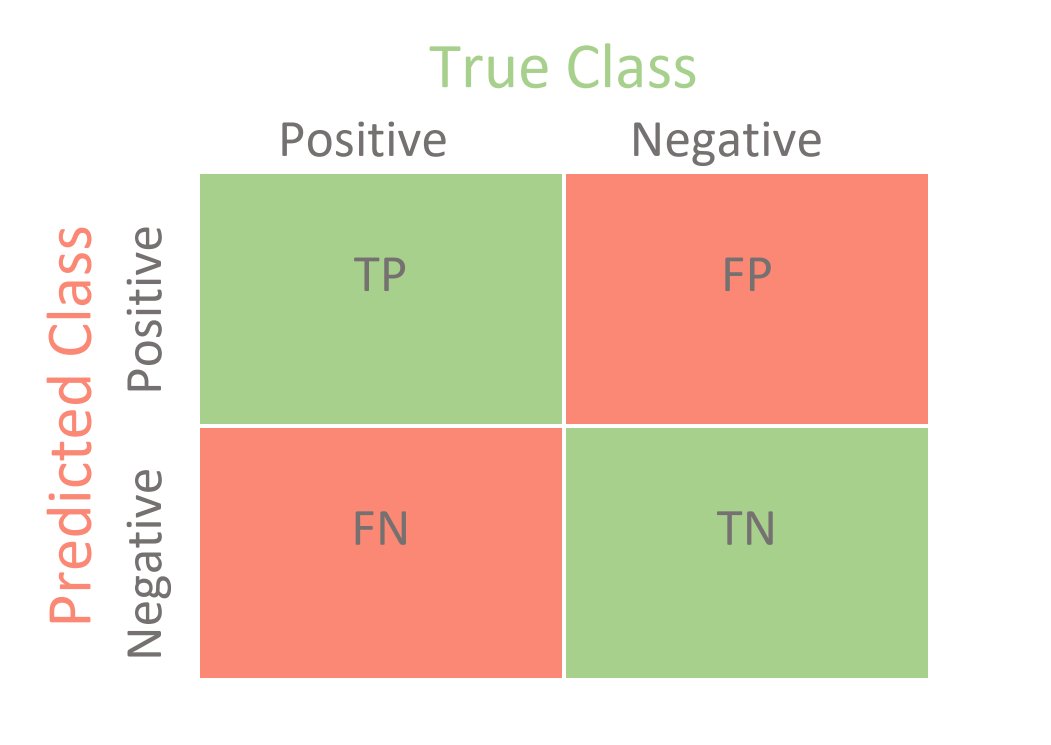

note:

1.   accuracy of the postive predictions is called the precision
2.   accuracy of the false negatives is called the recall



In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311)

In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) # f1_score is the harmonic mean of precision_score and recall_score

0.7325171197343846

** increasing precison reduces recall, unfortunately we can't have both, this is called precision-recall tradeoff!**

In [20]:
# scikit learn does not allow us to change the threshold value in the predict function by providing us with any parameters to change 
# we can use decision function instead and then set threshold as per our need
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [21]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred 
# SGD class uses the same threshold , there for our above code returs the same result

array([ True])

In [22]:
# now let's raise the result
threshold = 8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

question- when to decide what value of threshold to use?

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')

In [24]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [25]:
recalls, recalls.shape

(array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]), (59967,))

In [26]:
precisions, precisions.shape

(array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
        1.        ]), (59967,))

In [27]:
thresholds, thresholds.shape

(array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
          38871.26391927,   42216.05562787,   49441.43765905]), (59966,))

In [28]:
# now we will use matplotlib to plot our precision and recall vs threshold curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
  plt.plot(thresholds, recalls[:-1],'g-', label='recall')

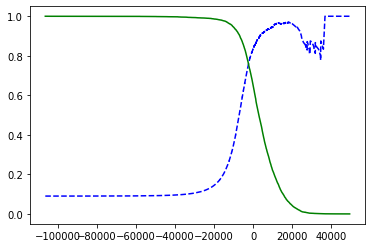

In [29]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

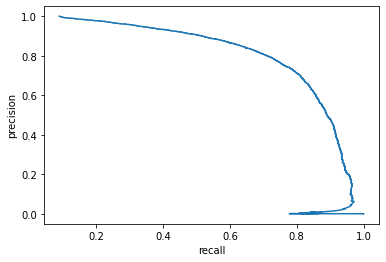

In [30]:
# now we will directly plot precisions against recalls
plt.plot(precisions, recalls)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show() # it depends on one's project to whether he wants high precision or high recall value. you can't get both.
# just looking at the graph we can say, at around 80 percent of recall, precision value starts to drop drastically.
# we can choose value of recall around 60 percent to keep precision high too, else we would have to sacrifice one thing.

# if in case we aim for 90 percent precision

In [31]:
 # now, we will aim for 90 percent precision
 threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

In [32]:
# now we will compare it with our original score 
y_train_pred_90 = (y_scores>= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [33]:
# now let's check precision score and recall score
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [34]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

»note - **so for right threshold, choose the threshold value corresponding to the recall and precision score that we have got. 
one can easily visualize everything from the graph above.**

** if someone says, 'let's reach 99 percent precision', you should ask, 'at what recall?'**

# THE ROC CURVE (reciever operating characterstics)

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [36]:
fpr, tpr, thresholds # fpr = false positive rate, tpr = true positive rate

(array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
        -105763.22240074, -106527.45300471, -146348.56726174]))

In [37]:
# now we can plot fpr v/s tpr
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

Text(0, 0.5, 'tpr')

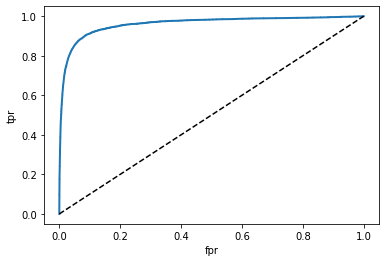

In [38]:
plot_roc_curve(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
# here also we can observe the tradeoff, lower is fpr, higher is tpr and vice versa
# higher the area under this roc curve, the more perfect the classifier is

In [39]:
# now let's calculate area under curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**»note** - we should use the precision/recall curve whenever our postive class is rare

In [40]:
# now let's train our model on RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [41]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [42]:
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [43]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

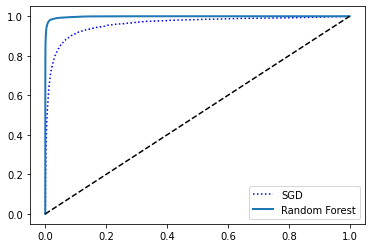

In [44]:
plt.plot(fpr,tpr,"b:", label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()
# from this graph we can see the difference between both the classifiers.

In [45]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

# **MULTICLASS CLASSIFICATION**

In [46]:
from sklearn.svm import SVC
svm_clf = SVC() # these all uses the one v/s one strategy for the classification, but we can make scikit learn do one v/s many classification too!
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [49]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [50]:
some_digit_scores # the highest score is indeed corresponding to class 5

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [51]:
np.argmax(some_digit_scores)

5

In [52]:
# making scikit learn do one vs rest classification
from sklearn.multiclass import OneVsRestClassifier
ov_clf = OneVsRestClassifier(SVC())
ov_clf.fit(X_train,y_train)
ov_clf.predict([some_digit])

array([5], dtype=uint8)

In [54]:
len(ov_clf.estimators_)

10

In [55]:
# let's train on a SGDClassifier
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [56]:
sgd_clf.decision_function([some_digit]) # we can see classifier is fairly confident about it's predictions

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [57]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy') # using cross validation function to evaluate the classifier's accuracy

array([0.87365, 0.85835, 0.8689 ])

In [59]:
# we can further improve our model performance by just scaling the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# now again using cross validation score function to evaluate our model on scaled data
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [60]:
# now let's do the error analysis using confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
# now let's make the matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

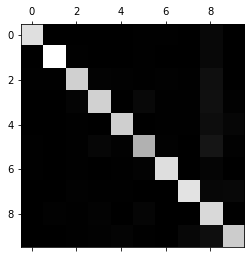

In [61]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()